In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prophet

In [2]:
df= pd.read_csv(r'C:\Users\vyshn\Desktop\DataScience-ML\Data Science Projects for Beginners\Classical-machine-learning-projects\Beginner projects\Dataset\DailyDelhiClimateTrain.csv')

In [3]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [4]:
df.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
df.describe()

meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


mean temperature in Delhi over the years:



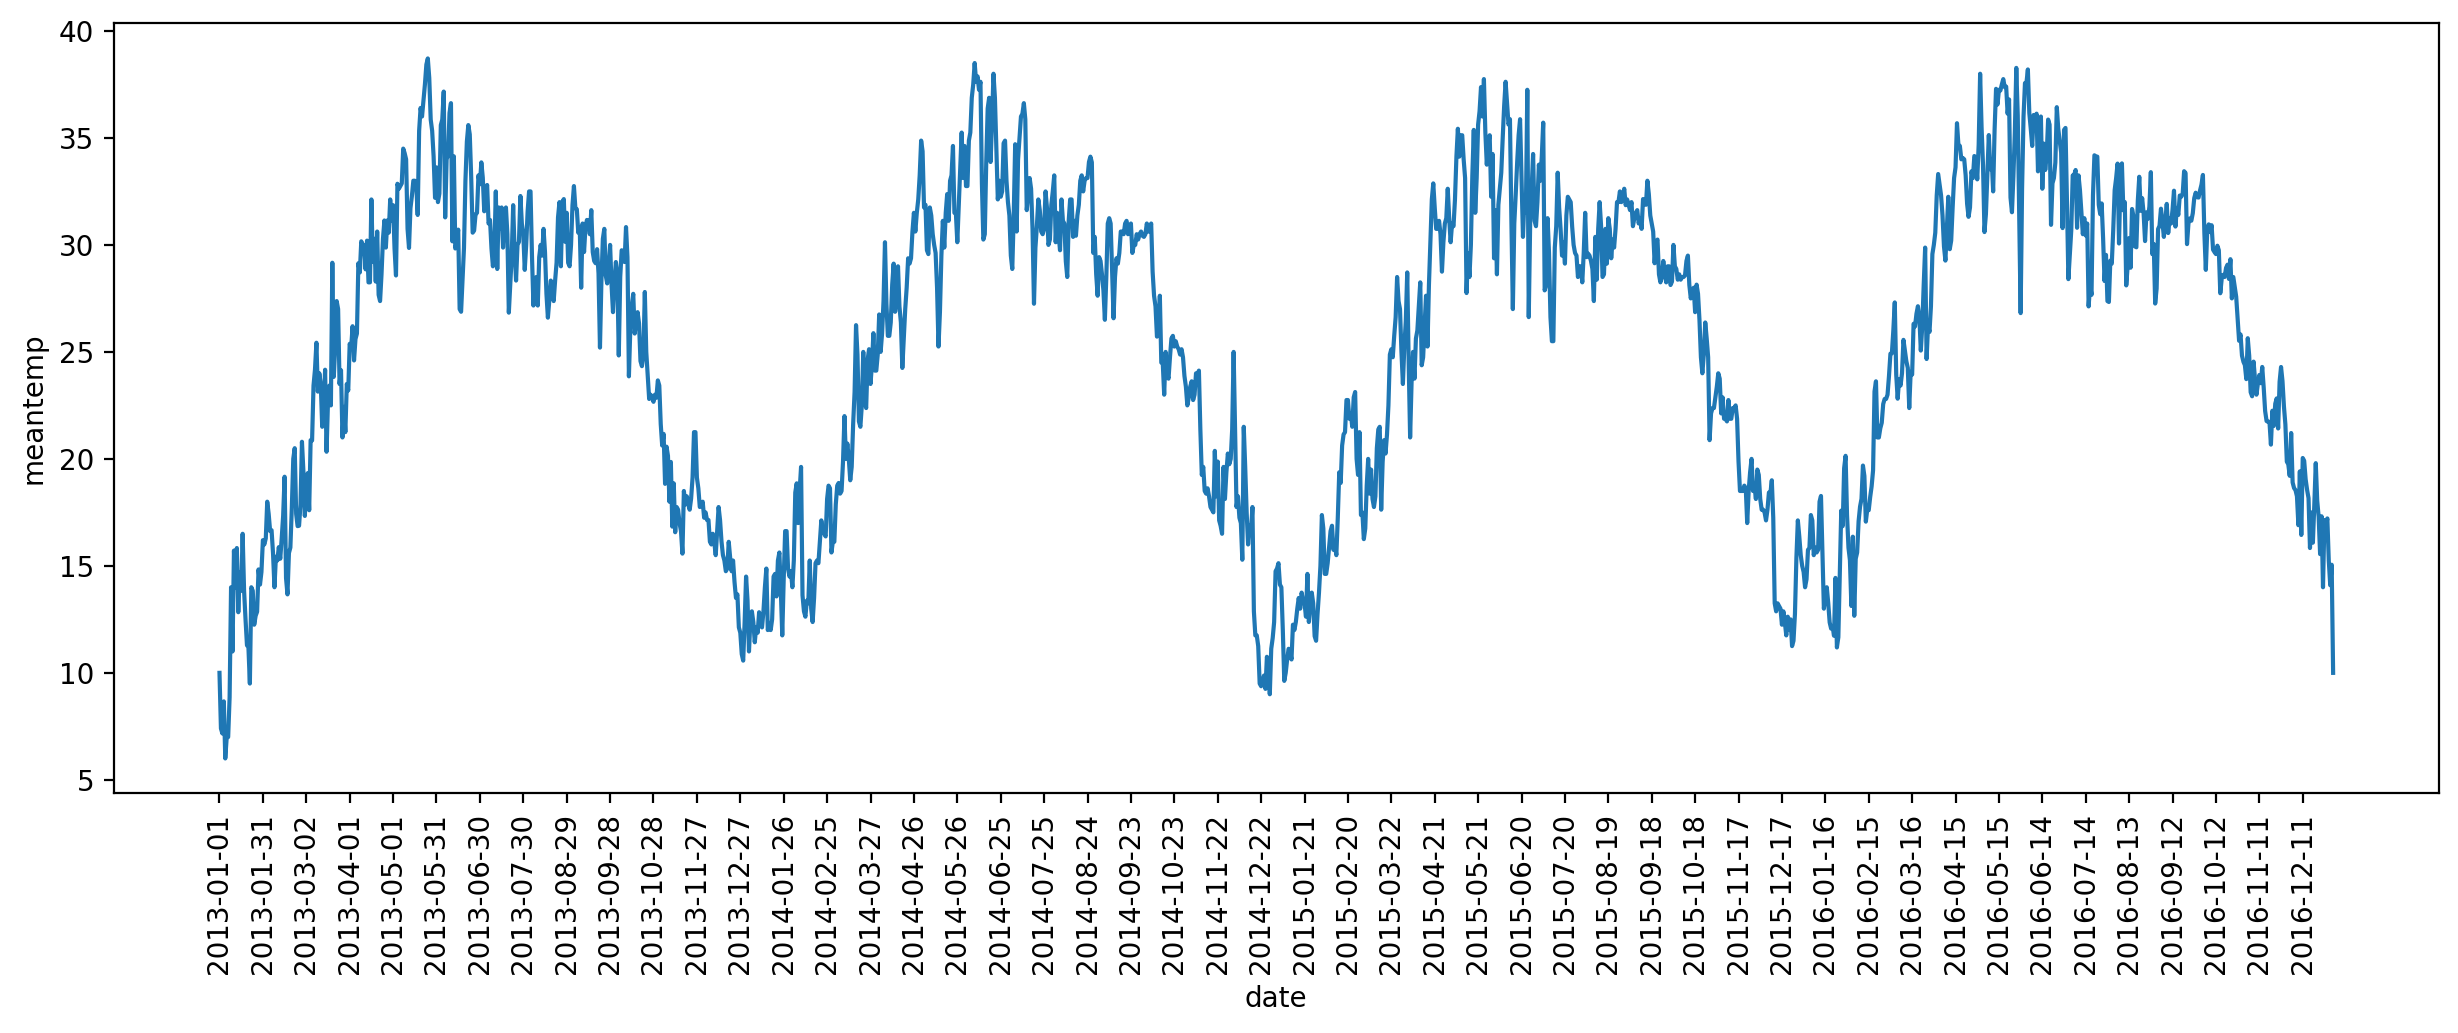

In [16]:
plt.figure(figsize=(15,5),dpi=200)
sns.lineplot(data=df, x='date', y='meantemp')
plt.xticks(df['date'][::30],rotation=90);

humidity in Delhi over the years:

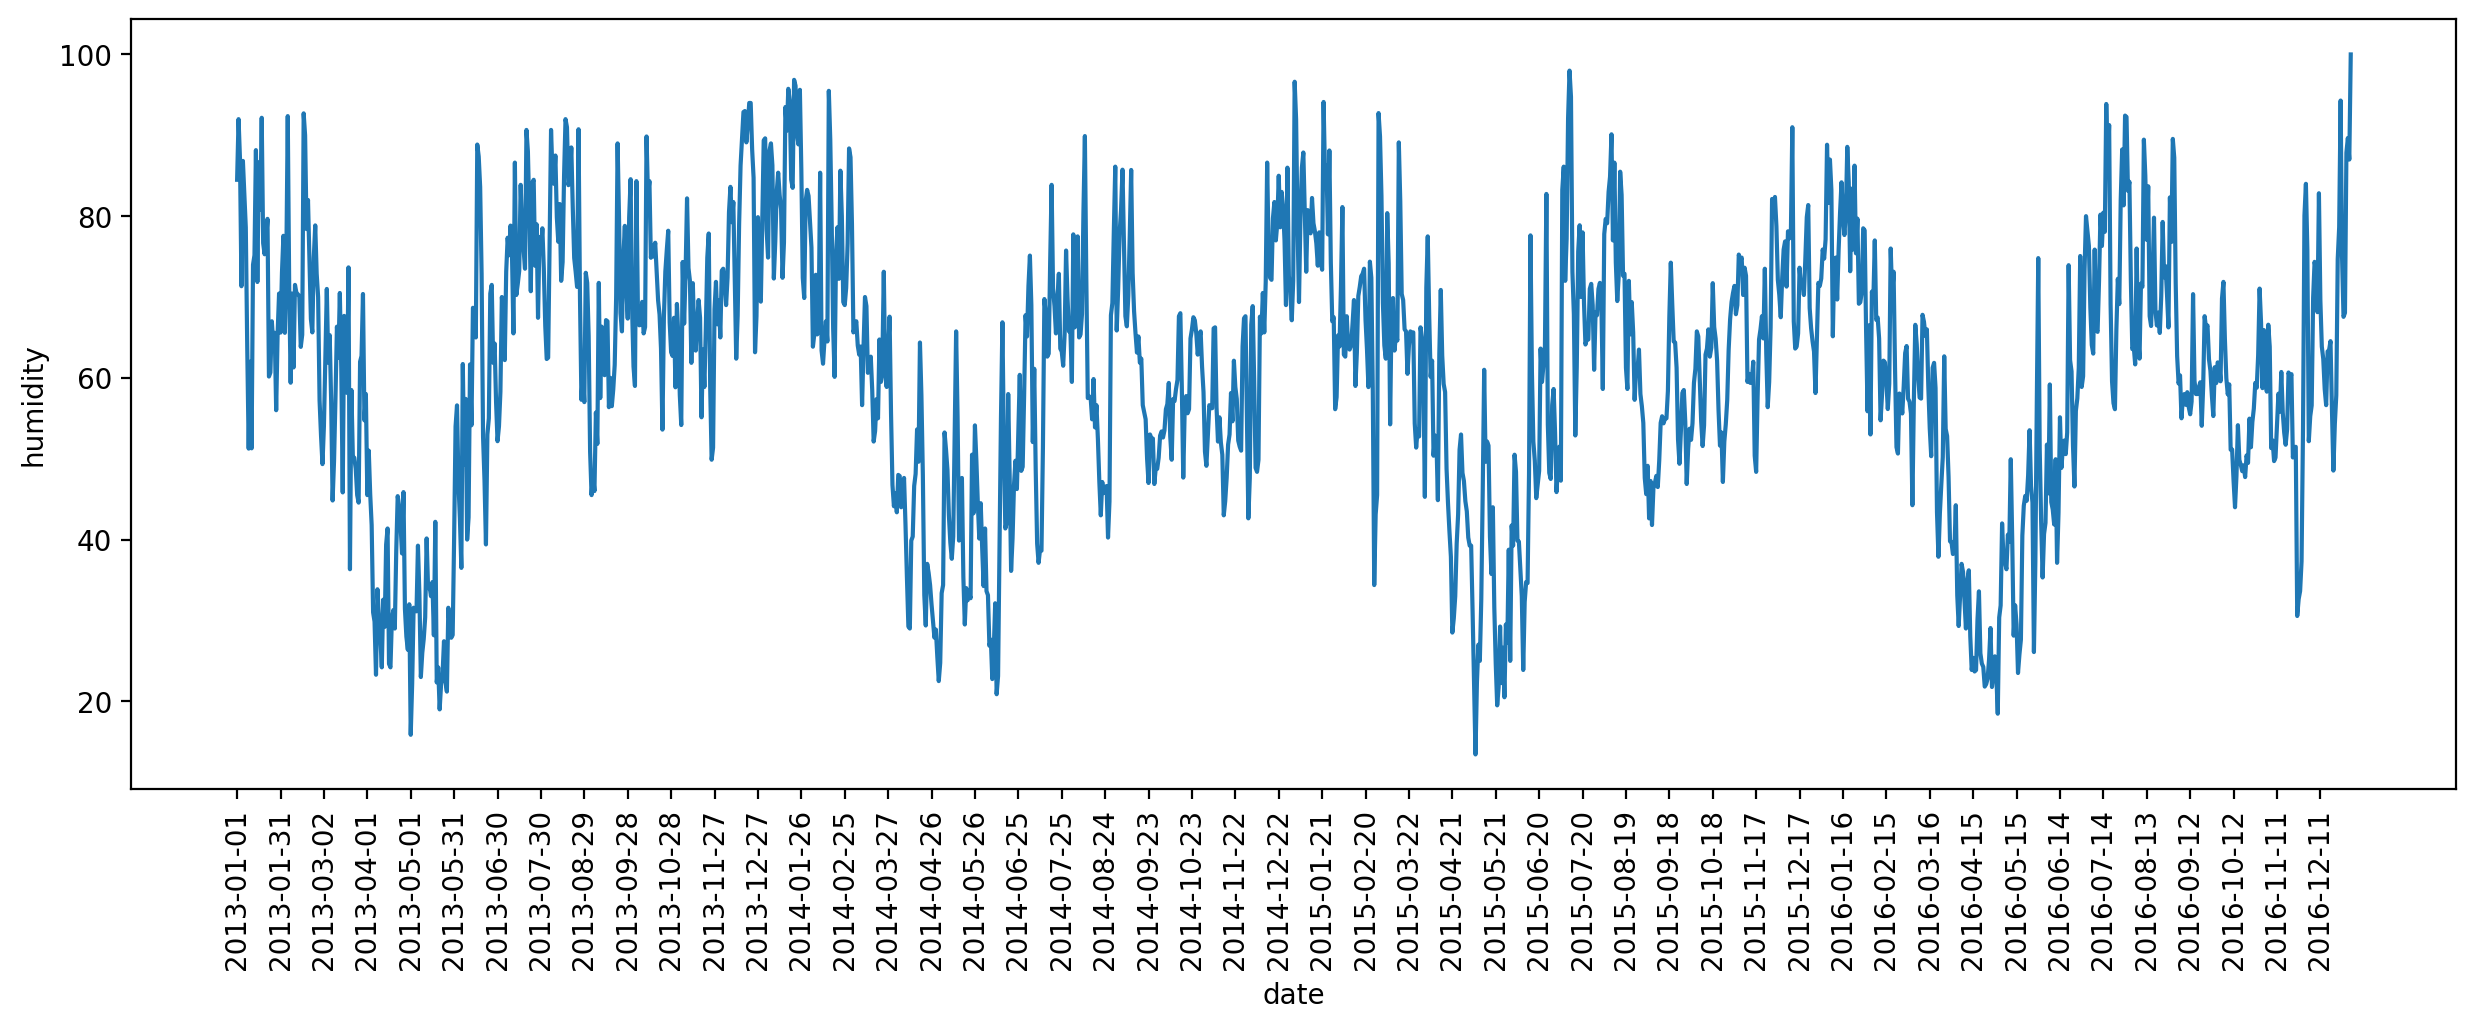

In [17]:
plt.figure(figsize=(15,5),dpi=200)
sns.lineplot(data=df, x='date', y='humidity')
plt.xticks(df['date'][::30],rotation=90);

wind speed in Delhi over the years

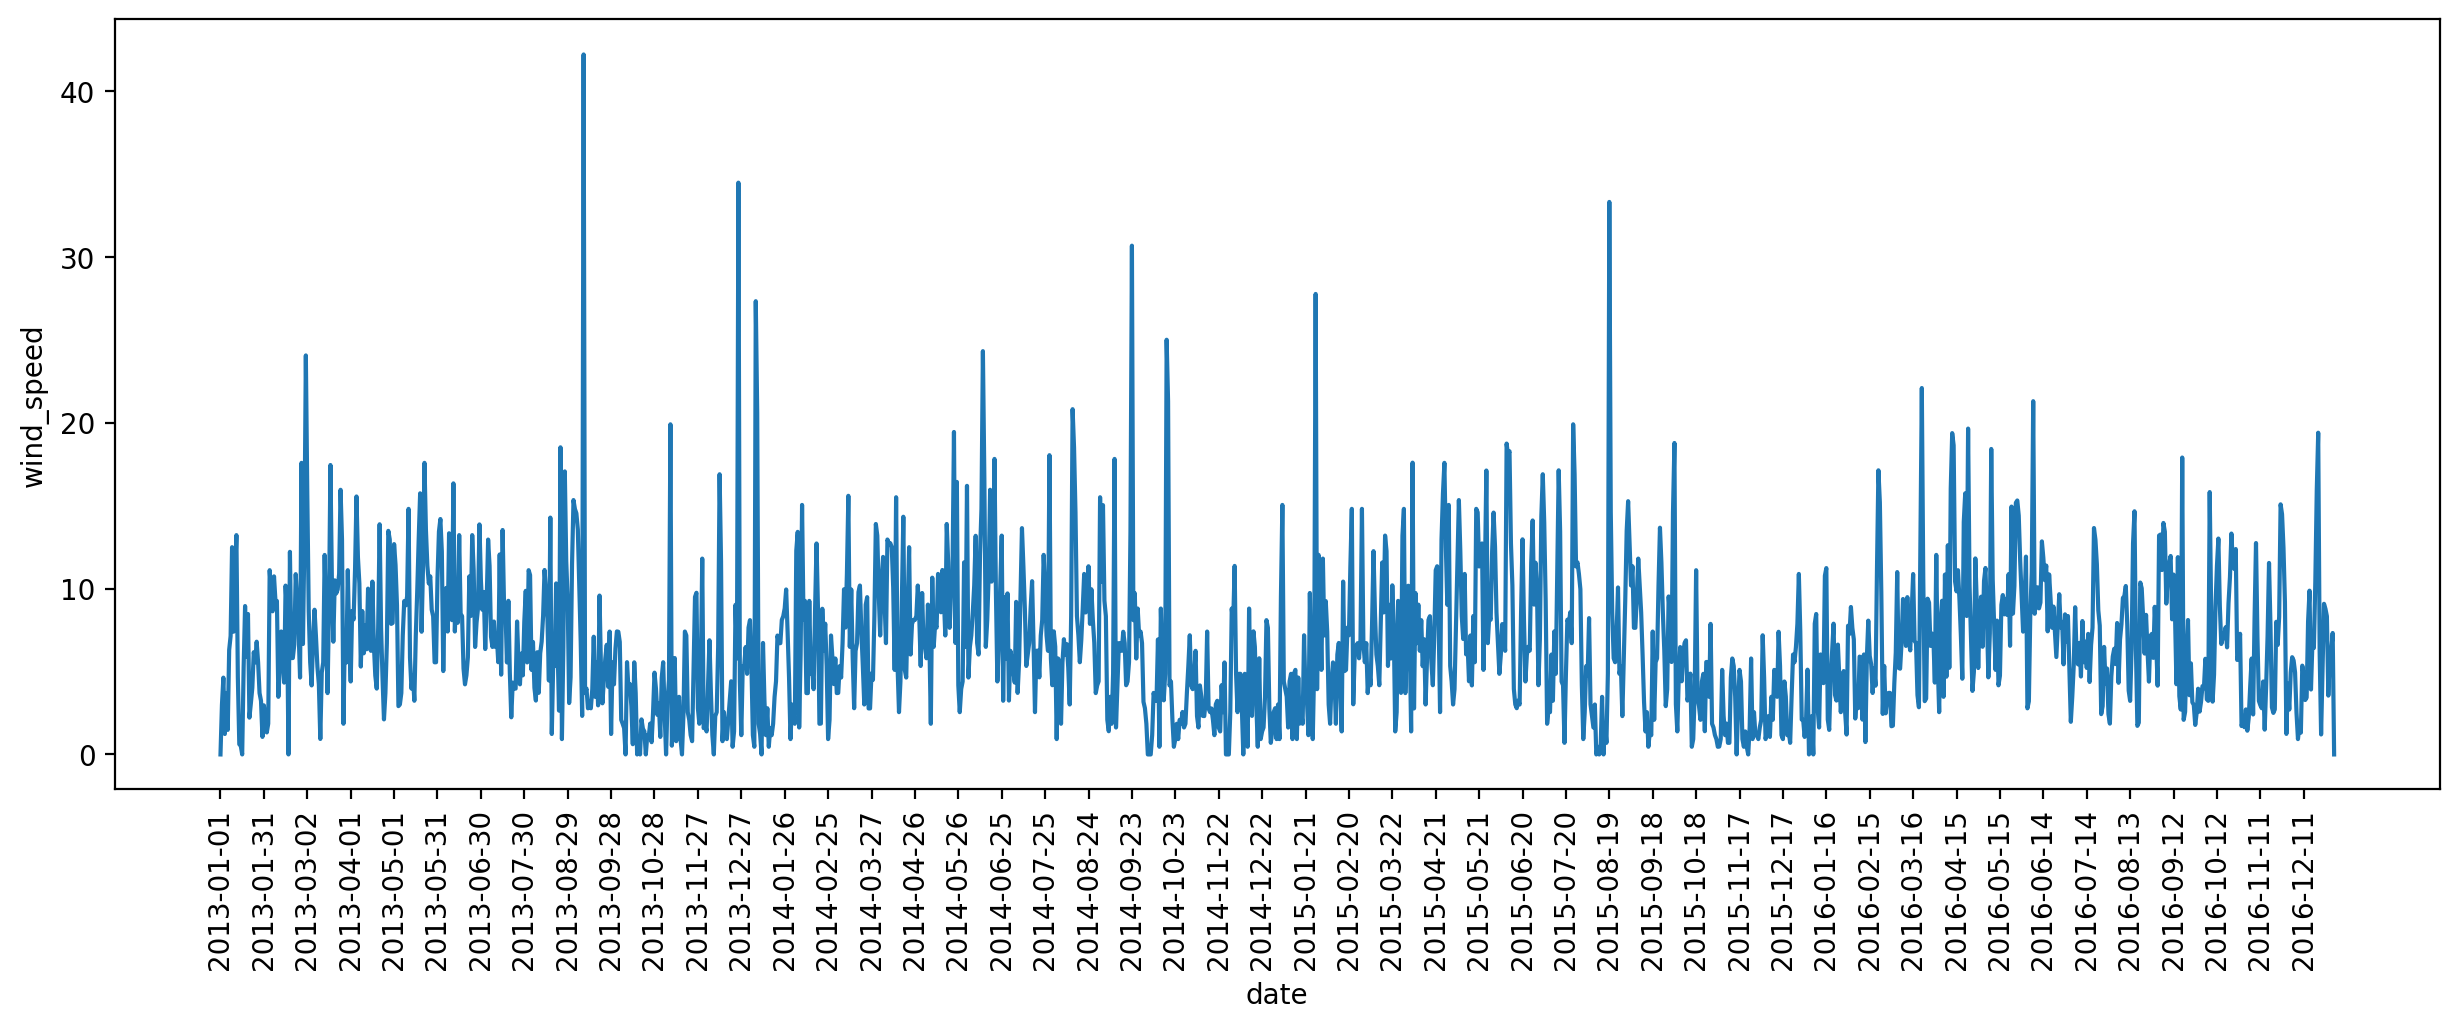

In [18]:
plt.figure(figsize=(15,5),dpi=200)
sns.lineplot(data=df, x='date', y='wind_speed')
plt.xticks(df['date'][::30],rotation=90);

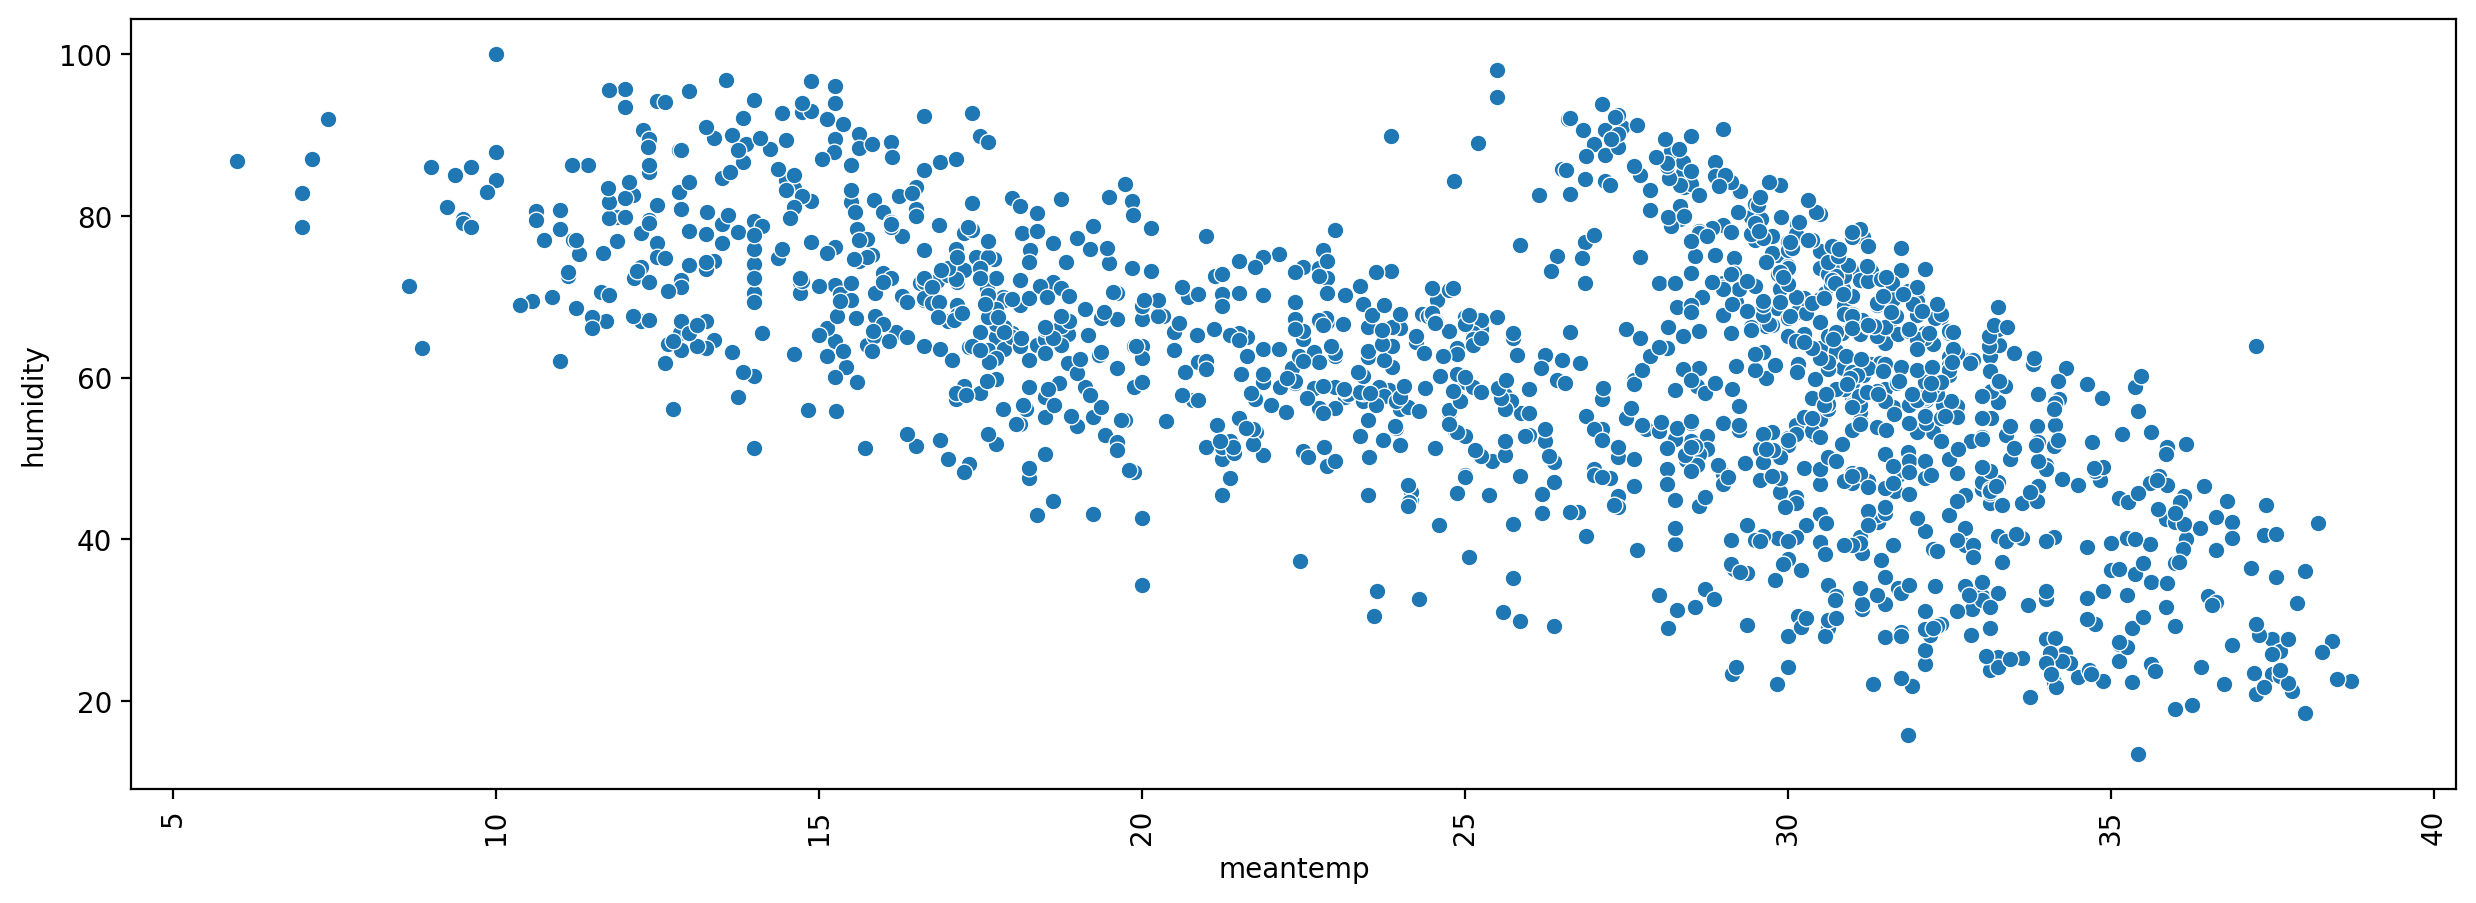

In [21]:
plt.figure(figsize=(15,5),dpi=200)
sns.scatterplot(data=df, x='meantemp', y='humidity')
plt.xticks(rotation=90);

There’s a negative correlation between temperature and humidity in Delhi. It means higher temperature results in low humidity and lower temperature results in high humidity.



change the data type and extract year and month data from the date column:



In [27]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   year          1462 non-null   int32         
 6   month         1462 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 68.7 KB


In [29]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

temperature change in Delhi over the years:

<Axes: xlabel='month', ylabel='meantemp'>

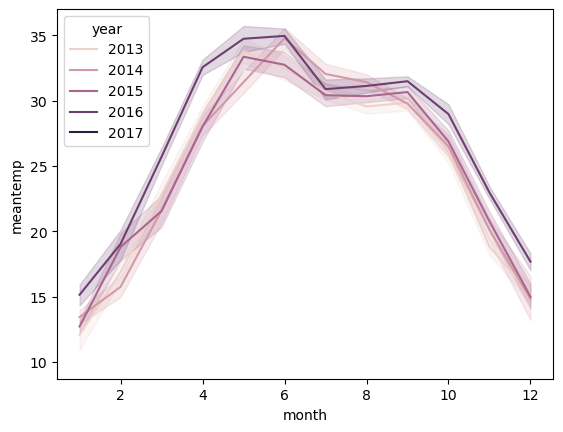

In [32]:
sns.lineplot(data=df, x='month', y='meantemp', hue='year')


The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:



In [36]:
forcast_data = df.rename(columns={'date':'ds', 'meantemp':'y'})

In [38]:
forcast_data.head()

ds          y   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

Now below is how we can use the Facebook prophet model for weather forecasting using Python:



In [42]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forcast_data)
forcasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forcasts)
plot_plotly(model, predictions)

16:12:03 - cmdstanpy - INFO - Chain [1] start processing
16:12:04 - cmdstanpy - INFO - Chain [1] done processing
